<a href="https://colab.research.google.com/github/Swastik-59/cats---dogs-classifier/blob/main/cats_vs_dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [28]:
!kaggle datasets download -d arpitjain007/dog-vs-cat-fastai

Dataset URL: https://www.kaggle.com/datasets/arpitjain007/dog-vs-cat-fastai
License(s): unknown
dog-vs-cat-fastai.zip: Skipping, found more recently modified local copy (use --force to force download)


In [29]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dog-vs-cat-fastai.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [31]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/dogscats/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/dogscats/valid",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

Found 23000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [32]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [33]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding="valid"))

model.add(Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding="valid"))

model.add(Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 55s 72ms/step - accuracy: 0.6159 - loss: 0.6532 - val_accuracy: 0.7170 - val_loss: 0.5472
Epoch 2/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 48s 67ms/step - accuracy: 0.7600 - loss: 0.5028 - val_accuracy: 0.7815 - val_loss: 0.5030
Epoch 3/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - accuracy: 0.8142 - loss: 0.4102 - val_accuracy: 0.7925 - val_loss: 0.4667
Epoch 4/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 49s 68ms/step - accuracy: 0.8672 - loss: 0.3066 - val_accuracy: 0.8015 - val_loss: 0.5506
Epoch 5/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - accuracy: 0.9218 - loss: 0.1949 - val_accuracy: 0.8020 - val_loss: 0.6816
Epoch 6/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.9610 - loss: 0.1092 - val_accuracy: 0.7890 - val_loss: 1.0941
Epoch 7/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 83s 68ms/step - accuracy: 0.9704 - loss: 0.0827 - val_accuracy: 0.7830 - val_loss: 1.0290
Epoch 8/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 47s 65ms/step - accuracy: 0.9798 - loss: 0.0596 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1.]], dtype=float32)

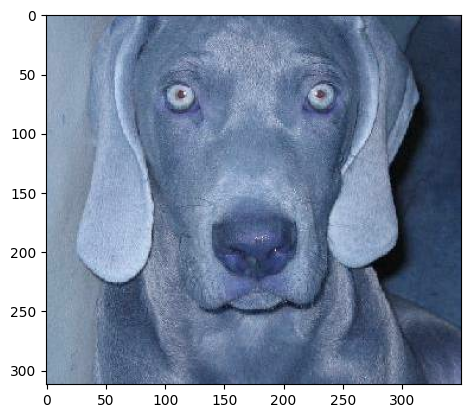

In [49]:
import cv2
import matplotlib.pyplot as plt
import random
img = random.randint(10001,10898)
test_img = cv2.imread(f"/content/dogscats/test1/{img}.jpg")
plt.imshow(test_img)
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)